# MNIST Digit Classification using Tensorflow

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)

We're using TF 2.0.0


# Look at the data
In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, Y_test) = mnist.load_data()

X_train [shape (60000, 28, 28)] sample patch:
 [[  0  76 246 252 112]
 [  0  85 252 230  25]
 [  0  85 252 223   0]
 [  0  85 252 145   0]
 [  0  86 253 225   0]]
A closeup of a sample patch:


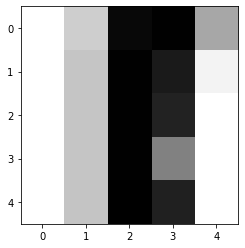

And the whole sample:


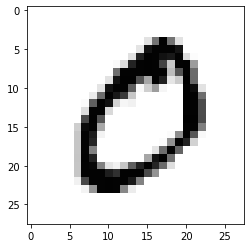

y_train [shape (60000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [3]:
# X contains rgb values divided by 255
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

# Linear model

Steps:-
* Normalize the train and test dataset
* Flatten the images (28x28 -> 784) with `X_train.reshape((X_train.shape[0], -1))` to simplify our linear model implementation
* Define an input and hidden layer with 128 neurons with relu activation function
* Create ouput layer with 10 neurons and a softmax activation function that will transform the score returned by the model to a value so it will be interpreted by humans.

In [6]:
#normailizing the data by scaling the pixel value in the range of 0 to 1
X_train=tf.keras.utils.normalize(X_train, axis=1)
X_test=tf.keras.utils.normalize(X_test, axis=1)

In [7]:
# Build the model object to perform flattening.
# Keras which is built on top of tensorflow simplifies this work than tensorflow.
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())


In [8]:
# Build the input and hidden layer with 128 neurons and relu activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) ## input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) ## hidden layer

In [9]:
# Build the output layer with 10 neurons and softmax activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

## Compiling the model

* add the optimizer (adam) which updates the parameter of the neural network to fit the data
* loss function to tell the performance of the model, using sparse categorical crossentropy
* metrics which indicates the quality of the model-- accuracy

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Training the model

In [11]:
model.fit(x=X_train,y=y_train,epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2610 - accuracy: 0.9231
Epoch 2/8
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1094 - accuracy: 0.9662
Epoch 3/8
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0739 - accuracy: 0.9768
Epoch 4/8
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0540 - accuracy: 0.9828
Epoch 5/8
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0413 - accuracy: 0.9865
Epoch 6/8
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0326 - accuracy: 0.9887
Epoch 7/8
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0263 - accuracy: 0.9909
Epoch 8/8
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0222 - accuracy: 0.9927


## Evaluate the model

In [12]:
test_loss, test_acc=model.evaluate(x=X_test,y=Y_test)
print('\n Test accuracy:',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### Model accuracy is 97.42% with 8 epochs

# Make predictions

In [13]:
predictions=model.predict([X_test])

In [15]:
#print the number
print(np.argmax(predictions[100]))

6


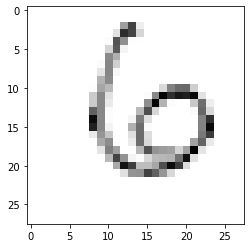

In [16]:
# plotting the image in the dataset
plt.imshow(X_test[100],cmap="Greys")
plt.show()

In [17]:
# playing with more numbers and checking the predictions

9


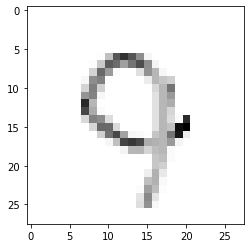

In [19]:
print(np.argmax(predictions[999]))
plt.imshow(X_test[999],cmap="Greys")
plt.show()

4


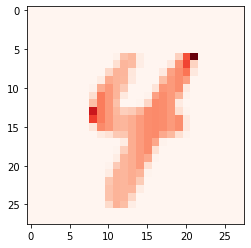

In [22]:
print(np.argmax(predictions[-3]))
plt.imshow(X_test[-3],cmap="Reds")
plt.show()